# Model selection: choosing estimators and their parameters

Score, and cross-validated scores

http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [2]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

To get a better measure of prediction accuracy (which we can use as a proxy for goodness of fit of the model), we can successively split the data in folds that we use for training and testing:

In [3]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
    
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


This is called a KFold cross-validation.

Cross-validation generators

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.
They expose a split method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.
This example shows an example usage of the split method.

In [4]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


The cross-validation can then be performed easily:

In [5]:
kfold = KFold(n_splits=3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
         for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

The cross-validation score can be directly calculated using the cross_val_score helper. Given an estimator, the cross-validation object and the input dataset, the cross_val_score splits the data repeatedly into a training and a testing set, trains the estimator using the training set and computes the scores based on the testing set for each iteration of cross-validation.
By default the estimator’s score method is used to compute the individual scores.
Refer the metrics module to learn more on the available scoring methods.

In [6]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
Alternatively, the scoring argument can be provided to specify an alternative scoring method.

In [7]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
C_s

array([  1.00000000e-10,   1.29154967e-09,   1.66810054e-08,
         2.15443469e-07,   2.78255940e-06,   3.59381366e-05,
         4.64158883e-04,   5.99484250e-03,   7.74263683e-02,
         1.00000000e+00])

In [9]:
scores = cross_val_score(estimator=svc, X=X, y=y, cv=10)
scores

array([ 0.93513514,  0.99453552,  0.9281768 ,  0.96111111,  0.96089385,
        0.98882682,  0.96648045,  0.97752809,  0.93220339,  0.96590909])

In [10]:
cv_scores = []
for C in C_s:
    svc.C = C
    scores = cross_val_score(estimator=svc, X=X, y=y, cv=10)
    score = np.mean(scores)
    cv_scores.append(score)
    print("C: " + str(C) + " - " + "Score: " + str(score))
    
print(cv_scores)

C: 1e-10 - Score: 0.120611273456
C: 1.29154966501e-09 - Score: 0.120611273456
C: 1.6681005372e-08 - Score: 0.120611273456
C: 2.15443469003e-07 - Score: 0.120611273456
C: 2.78255940221e-06 - Score: 0.132633131379
C: 3.5938136638e-05 - Score: 0.92039370715
C: 0.000464158883361 - Score: 0.95833722376
C: 0.00599484250319 - Score: 0.960527264269
C: 0.0774263682681 - Score: 0.96108002489
C: 1.0 - Score: 0.96108002489
[0.12061127345589495, 0.12061127345589495, 0.12061127345589495, 0.12061127345589495, 0.1326331313793922, 0.9203937071502416, 0.95833722375964103, 0.96052726426880464, 0.96108002488977162, 0.96108002488977162]


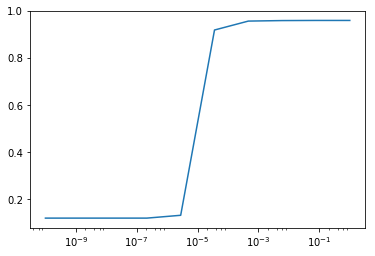

In [11]:
import matplotlib.pyplot as plt
plt.semilogx(C_s, cv_scores)
plt.show()

Automatically created module for IPython interactive environment


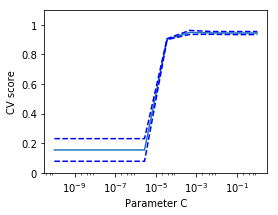

In [12]:
print(__doc__)


import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

Grid-search and cross-validated estimators

scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000]) 
print(clf.score(X_digits[:1000], y_digits[:1000]))
print(clf.best_score_)
print(Cs)
print(clf.best_estimator_.C)

1.0
0.925
[  1.00000000e-06   3.59381366e-06   1.29154967e-05   4.64158883e-05
   1.66810054e-04   5.99484250e-04   2.15443469e-03   7.74263683e-03
   2.78255940e-02   1.00000000e-01]
0.00774263682681


In [14]:
# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

By default, the GridSearchCV uses a 3-fold cross-validation. However, if it detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.

In [15]:
scores = cross_val_score(clf, X_digits, y_digits)
print(scores)
print(np.mean(scores))

[ 0.93853821  0.96327212  0.94463087]
0.948813732888


Two cross-validation loops are performed in parallel: one by the GridSearchCV estimator to set gamma and the other one by cross_val_score to measure the prediction performance of the estimator. The resulting scores are unbiased estimates of the prediction score on new data.

Cross-validated estimators

Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, scikit-learn exposes Cross-validation: evaluating estimator performance estimators that set their parameter automatically by cross-validation:

In [16]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [17]:
# The estimator chose automatically its lambda:
lasso.alpha_

0.012291895087486173

These estimators are called similarly to their counterparts, with ‘CV’ appended to their name.

In [18]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()

Automatically created module for IPython interactive environment


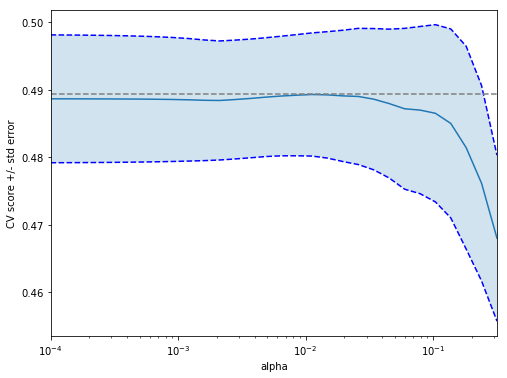

In [102]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()
#X = diabetes.data[:150]
#y = diabetes.target[:150]
X = diabetes.data[:]
y = diabetes.target[:]


lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, X, y, cv=n_folds, n_jobs=1, scoring='r2')
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)


plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


In [100]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



diabetes = datasets.load_diabetes()
#X = diabetes.data[:150]
#y = diabetes.target[:150]
X = diabetes.data[:]
y = diabetes.target[:]

X_test = diabetes.data[150:]
y_test = diabetes.target[150:]
est = Lasso()
alphas = np.logspace(-4, -0.5, 30)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    est.alpha = alpha
    this_scores = cross_val_score(est, X, y, cv=n_folds, n_jobs=1, scoring='r2')
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    
print(max(scores))

est.fit(X, y)
pred = est.predict(X_test)

# returns statistics
print("")
print("Results of Predict:")
print('MSE of test set: %.2f' % r2_score(y_test, pred))


alphas = np.logspace(-4, -0.5, 30)

# I'm going to use grid search
param_grid = dict(alpha=alphas)
gs = GridSearchCV(estimator=est, param_grid=param_grid, scoring='r2')
# Do grid search
gs.fit(X, y)
# Print out results of grid search
print("")
print("Parameter Grid for Grid Search on " + str(type(est).__name__))
print(param_grid)
print("")
print("Grid Search Results:")
print("Best Cross Validation Score: " + str(gs.best_score_))
print("Best Parameters: " + str(gs.best_params_))


0.489332744642

Results of Predict:
MSE of test set: 0.49

Parameter Grid for Grid Search on Lasso
{'alpha': array([  1.00000000e-04,   1.32035178e-04,   1.74332882e-04,
         2.30180731e-04,   3.03919538e-04,   4.01280703e-04,
         5.29831691e-04,   6.99564216e-04,   9.23670857e-04,
         1.21957046e-03,   1.61026203e-03,   2.12611233e-03,
         2.80721620e-03,   3.70651291e-03,   4.89390092e-03,
         6.46167079e-03,   8.53167852e-03,   1.12648169e-02,
         1.48735211e-02,   1.96382800e-02,   2.59294380e-02,
         3.42359796e-02,   4.52035366e-02,   5.96845700e-02,
         7.88046282e-02,   1.04049831e-01,   1.37382380e-01,
         1.81393069e-01,   2.39502662e-01,   3.16227766e-01])}

Grid Search Results:
Best Cross Validation Score: 0.489287525266
Best Parameters: {'alpha': 0.011264816923358867}
